In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [2]:
# Load the dataset
df = pd.read_excel('Rotten_Tomatoes_Movies3.xls')

# Check for missing values
df.isnull().sum()

# Drop irrelevant columns early
df = df.drop(['movie_info', 'critics_consensus'], axis=1)

# Drop rows where audience_rating is missing
df = df.dropna(subset=['audience_rating'])

# Convert categorical columns to strings and label encoding
for col in ['directors', 'writers', 'studio_name']:
    df[col] = df[col].fillna('Unknown').astype(str)

# Encode categorical columns
le = LabelEncoder()
df['rating'] = le.fit_transform(df['rating'])
df['tomatometer_status'] = le.fit_transform(df['tomatometer_status'])


In [3]:
# Define numerical and categorical columns
numerical_cols = ['rating', 'runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count']
categorical_cols = ['genre', 'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status']

# Create the preprocessor pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Fill missing numerical values with mean
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHot encoding for categorical features
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])


In [4]:
# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [5]:
# Extract features (X) and target (y)
X = df.drop('audience_rating', axis=1)
y = df['audience_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['rating',
                                                   'runtime_in_minutes',
                                                   'tomatometer_rating',
                                                   'tomatometer_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                 

In [6]:
# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate using different metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')


Mean Absolute Error: 11.438245881635146
Mean Squared Error: 216.68686982916415
Root Mean Squared Error: 14.720287695190068
R2 Score: 0.4749722527951892


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16386 entries, 0 to 16637
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16386 non-null  object        
 1   rating              16386 non-null  int32         
 2   genre               16369 non-null  object        
 3   directors           16386 non-null  object        
 4   writers             16386 non-null  object        
 5   cast                16126 non-null  object        
 6   in_theaters_date    15667 non-null  datetime64[ns]
 7   on_streaming_date   16385 non-null  datetime64[ns]
 8   runtime_in_minutes  16239 non-null  float64       
 9   studio_name         16386 non-null  object        
 10  tomatometer_status  16386 non-null  int32         
 11  tomatometer_rating  16386 non-null  int64         
 12  tomatometer_count   16386 non-null  int64         
 13  audience_rating     16386 non-null  float64   

<AxesSubplot:>

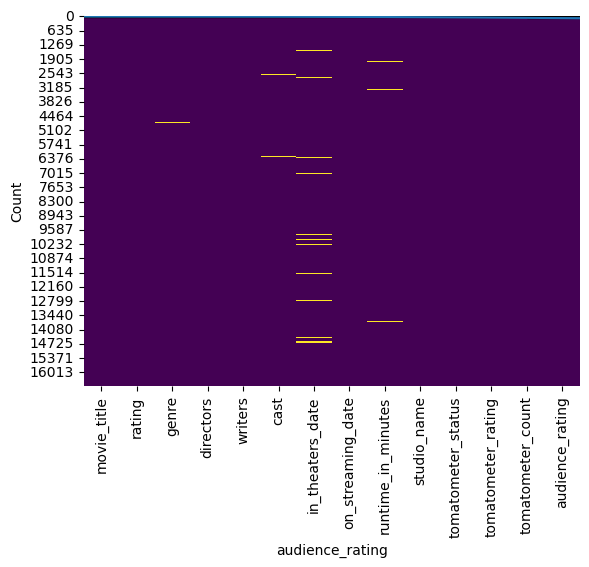

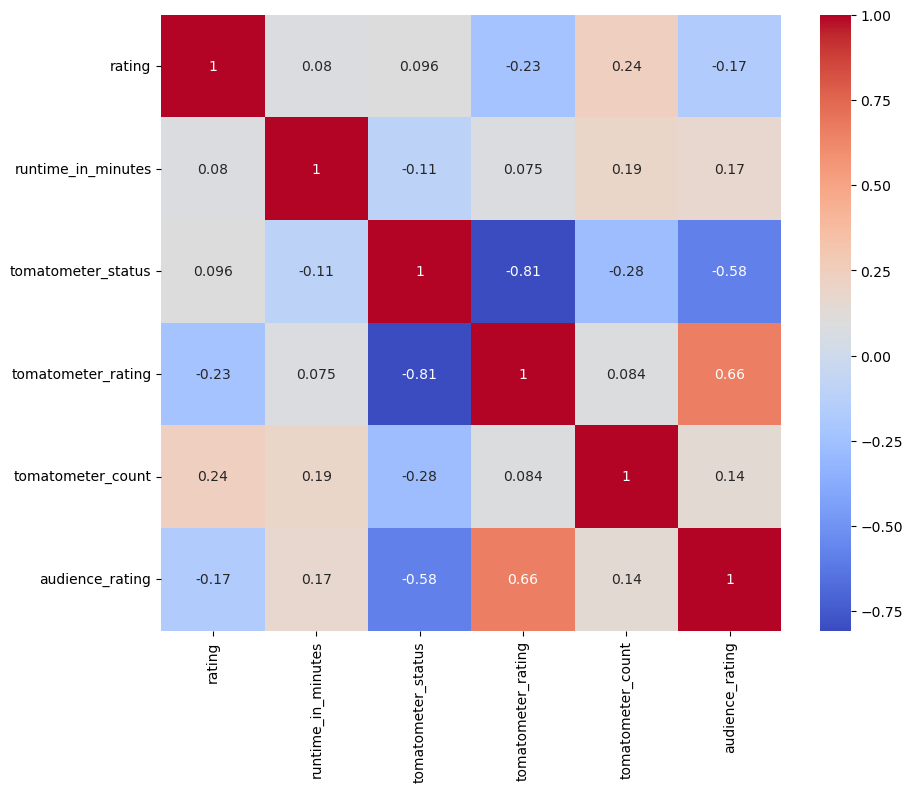

In [7]:
# Data overview
print(df.info())
print(df.describe())

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Distribution of target variable
sns.histplot(df['audience_rating'], kde=True)

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
